<a href="https://colab.research.google.com/github/Animeshsinghiit/Machine-learning-practises/blob/main/california_housing_dataset_practise_ml_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate,cross_val_score,learning_curve,ShuffleSplit,train_test_split,cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(306)
plt.style.use('seaborn')

In [3]:
suffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
feature,labels=fetch_california_housing(return_X_y=True,as_frame=True)

In [4]:
feature.shape

(20640, 8)

In [5]:
labels.shape

(20640,)

In [6]:
assert(feature.shape[0]==labels.shape[0])

In [7]:
train_features,test_features,train_labels,test_labels=train_test_split(feature,labels,random_state=42)

In [8]:
feature.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
pipe=Pipeline([('stand_scale',StandardScaler()),('model',LinearRegression())])

In [10]:
pipe.fit(train_features,train_labels)

Pipeline(steps=[('stand_scale', StandardScaler()),
                ('model', LinearRegression())])

In [11]:
pipe[-1].intercept_

2.0703489205426377

In [12]:
pipe[-1].coef_

array([ 0.85210815,  0.12065533, -0.30210555,  0.34860575, -0.00164465,
       -0.04116356, -0.89314697, -0.86784046])

In [13]:
pipe.score(test_features,test_labels)

0.5910509795491352

In [14]:
pipe.score(train_features,train_labels)

0.609873031052925

In [15]:
lin_reg_score=cross_val_score(pipe,train_features,train_labels,cv=suffle_split_cv,scoring='neg_mean_squared_error')

In [16]:
lin_reg_score

array([-0.50009976, -0.52183352, -0.55931218, -0.52110499, -0.56059203,
       -0.50510767, -0.52386194, -0.54775518, -0.5007161 , -0.54713448])

In [17]:
lin_reg_cv_results=cross_validate(pipe,train_features,train_labels,cv=suffle_split_cv,scoring='neg_mean_squared_error',return_train_score=True,return_estimator=True)

In [18]:
lin_reg_cv_results

{'fit_time': array([0.00748658, 0.00630236, 0.00601029, 0.00624228, 0.00757027,
        0.00772429, 0.00760555, 0.00654078, 0.00627661, 0.00628757]),
 'score_time': array([0.00163841, 0.00155926, 0.00154471, 0.00155854, 0.00162053,
        0.00166464, 0.00167871, 0.00157046, 0.00158119, 0.00156403]),
 'estimator': [Pipeline(steps=[('stand_scale', StandardScaler()),
                  ('model', LinearRegression())]),
  Pipeline(steps=[('stand_scale', StandardScaler()),
                  ('model', LinearRegression())]),
  Pipeline(steps=[('stand_scale', StandardScaler()),
                  ('model', LinearRegression())]),
  Pipeline(steps=[('stand_scale', StandardScaler()),
                  ('model', LinearRegression())]),
  Pipeline(steps=[('stand_scale', StandardScaler()),
                  ('model', LinearRegression())]),
  Pipeline(steps=[('stand_scale', StandardScaler()),
                  ('model', LinearRegression())]),
  Pipeline(steps=[('stand_scale', StandardScaler()),
        

In [19]:
feature_names=train_features.columns

In [20]:
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [21]:
cv_predictions=cross_val_predict(pipe,train_features,train_labels)

In [22]:
mse_cv=mean_squared_error(train_labels,cv_predictions)

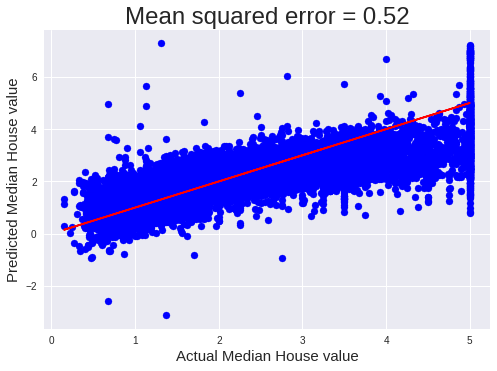

In [23]:
plt.scatter(train_labels, cv_predictions, color='blue')
plt.plot(train_labels, train_labels, 'r-')
plt.title(f"Mean squared error = {mse_cv:.2f}", size=24)
plt.xlabel('Actual Median House value', size=15)
plt.ylabel('Predicted Median House value',size=15)
plt.show()

In [24]:
train_error = -1 * lin_reg_cv_results['train_score']
test_error = -1 * lin_reg_cv_results['test_score']

In [25]:
print(f"Mean squared error of linear regression model on the train set:\n"
f"{train_error.mean():.3f} +/- {train_error.std():.3f}")
print(f"Mean squared error of linear regression model on the test set:\n"
f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squared error of linear regression model on the train set:
0.519 +/- 0.006
Mean squared error of linear regression model on the test set:
0.529 +/- 0.022


In [26]:
best_model_index = np.argmin(test_error)
selected_model = lin_reg_cv_results['estimator'][best_model_index]

In [27]:
best_model_index

0

In [28]:
selected_model

Pipeline(steps=[('stand_scale', StandardScaler()),
                ('model', LinearRegression())])

In [29]:
test_error

array([0.50009976, 0.52183352, 0.55931218, 0.52110499, 0.56059203,
       0.50510767, 0.52386194, 0.54775518, 0.5007161 , 0.54713448])

In [30]:
print ("Intercept (w_0): ", selected_model['model'].intercept_)
print ("Coefficients (w_1, ..., w_m): ", selected_model['model'].coef_)

Intercept (w_0):  2.0779898917958657
Coefficients (w_1, ..., w_m):  [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


In [31]:
test_predictions_cv=selected_model.predict(test_features)

In [32]:
test_predictions_cv

array([0.73548515, 1.7725621 , 2.70011199, ..., 1.72922496, 2.34393553,
       3.5176306 ])

In [33]:
test_predictions=pipe.predict(test_features)

In [34]:
test_predictions

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

In [35]:
score_cv = selected_model.score(test_features, test_labels)
score = pipe.score(test_features, test_labels)
print ("R2 score for the best model obtained via cross validation: ", score_cv)
print ("R2 score for model without cv: ", score)

R2 score for the best model obtained via cross validation:  0.5923577635319088
R2 score for model without cv:  0.5910509795491352


In [36]:
mse = mean_squared_error(test_labels, test_predictions)
mse_cv = mean_squared_error(test_labels, test_predictions_cv)
print ("MSE for the best model obtained via cross validation: ", mse_cv)
print ("MSE for model without cv: ", mse)

MSE for the best model obtained via cross validation:  0.5393995876218523
MSE for model without cv:  0.5411287478470688
